# Binôme : Islam Bendaoud, Sarah Issaad

# Statistiques de corpus

## Préliminaires

Pour mieux comprendre les choix qui s'offrirons à nous par la suite, nous allons commencer par utiliser des outils élémentaires. Rédigez vos réponses.  

### Questions (les 5 premières questions sont notées sur 15 pts la dernière sur 5 pts)

> 1. Chargez le texte qui se trouve dans le fichier `roman.txt`. Débarrassez vous des 1373 premiers caractères puis des 18410 derniers. Combien de caractères contient ce texte? Combien de caractères uniques? En utilisant des expressions régulières, découper le texte en paragraphes. Combien de paragraphes contient ce texte? Combien de paragraphes uniques ? 
> 1. Ce roman va constituer notre premier corpus. Nous devons également déterminer ce que nous allons considèrer comme étant des mots. Est-ce que les signes de ponctuations sont des mots? Est-ce que les mots en majuscules sont différents des mots en minuscules? Que faire des contractions signalées par des apostrophes comme par exemple: I'm, don't ? Avec l'option que vous aurez choisie, combien de mots contient le corpus? Combien de mots uniques?
> 1. Quels sont les 100 mots les plus fréquents? Les 100 mots avec le moins d'occurrences? Commentez.
> 1. *Loi de Zipf*: Tracez la distribution des fréquences d'occurrences des mots, puis le nombre d'occurrences des mots en fonction de rang de fréquence (voir la définition de wikipedia). Commentez.
> 1. *Loi de Herdan ou de Heaps* : vérifiez la loi suivante : $|V| = k N^{\beta}$, avec $k>0$ et $0<\beta<1$ des constantes et $N$ le nombre de mots. Quelles valeurs trouvez vous pour $k$ et $\beta$.
> 1. Implémentez l'algorithme de byte-pair encoding. Comparez les vocabulaires obtenus. Est-ce que le vocabulaire obtenu suit la loi de Zipf?

In [89]:
import re

In [90]:
with open ("roman.txt", encoding='utf-8') as f:
    txt_raw = f.read()
    
head = txt_raw[0:1373]
foot = txt_raw[-18410:]
body = txt_raw[1373:-18410]

print(head[0:77])
print("=======================")
print(body[0:400])
print("\n======= . . . =======\n")
print(body[-400:])

﻿The Project Gutenberg eBook of Frankenstein, by Mary Wollstonecraft Shelley

Letter 1

_To Mrs. Saville, England._


St. Petersburgh, Dec. 11th, 17—.


You will rejoice to hear that no disaster has accompanied the
commencement of an enterprise which you have regarded with such evil
forebodings. I arrived here yesterday, and my first task is to assure
my dear sister of my welfare and increasing confidence in the success
of my undertaking.

I am already far north of London, 

======= . . . =======

lt in the agony of the torturing flames. The light of that conflagration
will fade away; my ashes will be swept into the sea by the winds. My spirit
will sleep in peace, or if it thinks, it will not surely think thus.
Farewell.”

He sprang from the cabin-window as he said this, upon the ice raft
which lay close to the vessel. He was soon borne away by the waves and
lost in darkness and distance.




## Question 1

> 1. Chargez le texte qui se trouve dans le fichier `roman.txt`. Débarrassez vous des 1373 premiers caractères puis des 18410 derniers. Combien de caractères contient ce texte? Combien de caractères uniques? En utilisant des expressions régulières, découper le texte en paragraphes. Combien de paragraphes contient ce texte? Combien de paragraphes uniques ? 

In [91]:
# Nombre de caractères : 
print("Nombre de caractères dans le body :", len(body))

Nombre de caractères dans le body : 418919


En utilisant `set()` les caractères doublons sont retirés, on peut donc savoir le nombre de caractères uniques.

In [92]:
print(set(body))
print("Nombre de caractères uniques du texte :", len(set(body)))

{'A', '”', '7', ']', 'r', 'm', 'z', 'G', 'o', 'é', 'h', '8', 'L', 'W', 'B', 'n', '-', '4', '\n', 'v', 'q', '5', '.', 'D', 'O', '6', '!', 'b', '“', ' ', 's', ',', 'p', 'w', 'N', 'M', '?', '[', 'f', '’', 'è', 'a', 'R', 'J', 'ô', '_', 'Y', 'u', '9', '0', 'V', '—', 'I', 'c', 'd', ';', 'æ', ')', 'P', 'j', 'F', 'T', 'g', 'K', '‘', 'C', 'x', 'H', 'U', '2', 'S', '(', 'e', 'i', 'k', '3', '1', ':', 'ê', 'E', 'l', 't', 'y'}
Nombre de caractères uniques du texte : 83


In [93]:
body[:500]

'Letter 1\n\n_To Mrs. Saville, England._\n\n\nSt. Petersburgh, Dec. 11th, 17—.\n\n\nYou will rejoice to hear that no disaster has accompanied the\ncommencement of an enterprise which you have regarded with such evil\nforebodings. I arrived here yesterday, and my first task is to assure\nmy dear sister of my welfare and increasing confidence in the success\nof my undertaking.\n\nI am already far north of London, and as I walk in the streets of\nPetersburgh, I feel a cold northern breeze play upon my cheeks, whic'

En regardant le texte sans utiliser `print`, on remarque que les paragraphes sont séparés d'au moins 2 caractères `\n`, parfois plus. On peut donc utiliser l'expression régulière `\n\n+`, qui signifie donc deux `\n` ou plus. En utilisant la fonction split,  on peut séparer deux bouts de texte entre `\n\n+`.

In [94]:
paragraphes = re.split(r'\n\n+', body)
paragraphes[:4]

['Letter 1',
 '_To Mrs. Saville, England._',
 'St. Petersburgh, Dec. 11th, 17—.',
 'You will rejoice to hear that no disaster has accompanied the\ncommencement of an enterprise which you have regarded with such evil\nforebodings. I arrived here yesterday, and my first task is to assure\nmy dear sister of my welfare and increasing confidence in the success\nof my undertaking.']

In [95]:
print("Nombre de paragraphes :", len(paragraphes))

Nombre de paragraphes : 791


In [96]:
print("Nombre de paragraphes uniques :", len(set(paragraphes)))

Nombre de paragraphes uniques : 787


Il y a des paragraphes qui sont pareils. On peut découvrir lesquels à l'aide d'une bibliothèque, `collections`. En utilisant la classe `Counter` et la méthode `most_common`, on peut voir les paragraphes les plus répétés.

In [97]:
import collections

In [98]:
c_parag = collections.Counter(paragraphes)

In [99]:
c_parag.most_common()[:3]

[('_To Mrs. Saville, England._', 4),
 ('“Elizabeth Lavenza.', 2),
 ('Letter 1', 1)]

## Question 2

> 2. Ce roman va constituer notre premier corpus. Nous devons également déterminer ce que nous allons considèrer comme étant des mots. Est-ce que les signes de ponctuations sont des mots? Est-ce que les mots en majuscules sont différents des mots en minuscules? Que faire des contractions signalées par des apostrophes comme par exemple: I'm, don't ? Avec l'option que vous aurez choisie, combien de mots contient le corpus? Combien de mots uniques?

Ici on garde la ponctuation car elle peut donner des informations sur une phrase. Les contractions comme "I'm" et "don't" n'apparaissent pas dans le texte, donc on n'a pas besoin de les enlever. Cependant, cela pourrait être nécessaire, pour par exemple compter le nombre d'occurrences si "do not" et "don't" sont tous les deux utilisés dans le texte. Ici, on choisit de mettre tous les mots en minuscule, puisque les ponctuations déterminent les débuts de phrases. Les `\n` ne font pas partie des mots, on les enlève aussi.

In [100]:
print("I'm dans body :", "I'm" in body)
print("I am dans body :", "I am" in body)
print("don't ou Don't dans body :", "don't" in body or "Don't" in body)
print("do not dans body :", "do not" in body)

I'm dans body : False
I am dans body : True
don't ou Don't dans body : False
do not dans body : True


Pour considérer les ponctuations comme des mots, on doit les espacer. On peut utiliser la fonction `sub` de la bibliothèque des expressions régulières. On prend une ponctuation avec "\W" et "\_", qui est la seule ponctuation à ne pas être dans \W, et on la remplace par un espace suivi du même caractère, qui est lui même suivi d'un espace. On garde le caractère avec (), et `\1`est le caractère dans le champ de remplacement. Petit détail : il faut mettre `\` pour signifier que c'est un caractère spécial. A noter également que ce n'est pas un souci d'avoir plusieurs espaces entre deux mots.

In [101]:
body_esp = re.sub(r'([\W_])', ' \\1 ', body)
body_esp[:500]

'Letter   1 \n  \n  _ To   Mrs .    Saville ,    England .  _  \n  \n  \n St .    Petersburgh ,    Dec .    11th ,    17 —  .  \n  \n  \n You   will   rejoice   to   hear   that   no   disaster   has   accompanied   the \n commencement   of   an   enterprise   which   you   have   regarded   with   such   evil \n forebodings .    I   arrived   here   yesterday ,    and   my   first   task   is   to   assure \n my   dear   sister   of   my   welfare   and   increasing   confidence   in   the   success \n of  '

Ensuite, on met les lettres en minuscule avec `lower()` et on sépare les mots par espaces et \n avec split :

In [102]:
body_clean = body_esp.lower()
words_clean = body_clean.split()

In [103]:
print("Nombre de mots : ", len(words_clean))

Nombre de mots :  85976


In [104]:
print("Nombre de mots uniques :", len(set(words_clean)))

Nombre de mots uniques : 7020


## Question 3 

> 3. Quels sont les 100 mots les plus fréquents? Les 100 mots avec le moins d'occurrences? Commentez.

In [105]:
counter_words = collections.Counter((words_clean))

In [106]:
counter_words.most_common(100)

[(',', 4956),
 ('the', 4194),
 ('and', 2976),
 ('.', 2920),
 ('i', 2850),
 ('of', 2642),
 ('to', 2094),
 ('my', 1776),
 ('a', 1391),
 ('in', 1129),
 ('was', 1021),
 ('that', 1018),
 (';', 971),
 ('me', 867),
 ('but', 687),
 ('had', 686),
 ('with', 667),
 ('he', 608),
 ('you', 574),
 ('which', 558),
 ('it', 547),
 ('his', 535),
 ('as', 528),
 ('not', 510),
 ('for', 498),
 ('“', 480),
 ('by', 460),
 ('on', 460),
 ('this', 402),
 ('from', 385),
 ('her', 373),
 ('have', 365),
 ('be', 360),
 ('when', 328),
 ('at', 317),
 ('were', 308),
 ('is', 307),
 ('”', 293),
 ('she', 255),
 ('your', 252),
 ('!', 238),
 ('him', 222),
 ('?', 220),
 ('an', 211),
 ('they', 210),
 ('so', 210),
 ('one', 206),
 ('all', 200),
 ('could', 197),
 ('will', 194),
 ('if', 194),
 ('been', 190),
 ('their', 186),
 ('would', 184),
 ('are', 176),
 ('or', 176),
 ('we', 174),
 ('who', 174),
 ('no', 172),
 ('more', 165),
 ('now', 155),
 ('these', 154),
 ('should', 153),
 ('yet', 152),
 ('some', 147),
 ('before', 146),
 ('’',

In [107]:
counter_words.most_common()[-100:]

[('surgeon', 1),
 ('composing', 1),
 ('grieve', 1),
 ('bidding', 1),
 ('blamable', 1),
 ('paramount', 1),
 ('claims', 1),
 ('included', 1),
 ('refusing', 1),
 ('actuated', 1),
 ('renounce', 1),
 ('points', 1),
 ('balancing', 1),
 ('misled', 1),
 ('disturbs', 1),
 ('distinguishing', 1),
 ('fainter', 1),
 ('feebly', 1),
 ('irradiation', 1),
 ('comment', 1),
 ('depth', 1),
 ('inadequate', 1),
 ('overshadowed', 1),
 ('portend', 1),
 ('fairly', 1),
 ('stir', 1),
 ('hoarser', 1),
 ('comes', 1),
 ('fated', 1),
 ('locks', 1),
 ('texture', 1),
 ('consummated', 1),
 ('irretrievably', 1),
 ('lovedst', 1),
 ('obeying', 1),
 ('scaring', 1),
 ('reproaches', 1),
 ('superfluous', 1),
 ('heeded', 1),
 ('stings', 1),
 ('diabolical', 1),
 ('thousandth', 1),
 ('lingering', 1),
 ('wrenched', 1),
 ('pitied', 1),
 ('disobey', 1),
 ('riot', 1),
 ('adapt', 1),
 ('rekindled', 1),
 ('whine', 1),
 ('torch', 1),
 ('buildings', 1),
 ('hypocritical', 1),
 ('withdrawn', 1),
 ('participated', 1),
 ('opprobrium', 1),
 

Les mots les plus communs sont des mots communs en général, tels que "the", "and" ou bien des ponctuations. Les mots les moins communs sont plus descriptifs du roman, comme "surgeon" ou "grieve", qui peuvent être représentatifs du thème du livre.

## Question 4

> 4. *Loi de Zipf*: Tracez la distribution des fréquences d'occurrences des mots, puis le nombre d'occurrences des mots en fonction de rang de fréquence (voir la définition de wikipedia). Commentez.

# Expliquer la loi de Zipf

Distribution des fréquences d'occurrences : on utilise most_common, qui renvoie ces occurrences.

In [108]:
import numpy as np
import matplotlib.pyplot as plt

In [109]:
freq_words = np.array(counter_words.most_common())

In [110]:
freq_words

array([[',', '4956'],
       ['the', '4194'],
       ['and', '2976'],
       ...,
       ['conflagration', '1'],
       ['fade', '1'],
       ['thinks', '1']], dtype='<U18')

In [111]:
# On ne prend pas les mots, uniquement les occurrences.
liste_occ = freq_words[:, 1].astype(int)

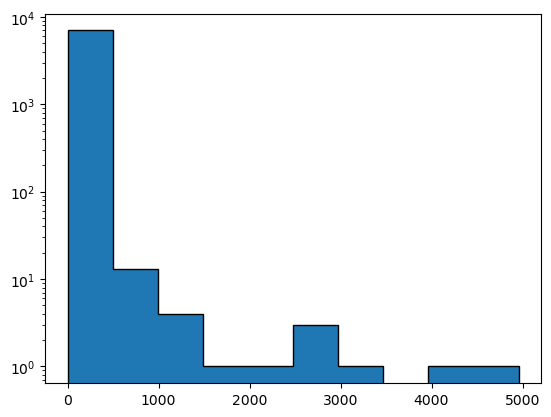

In [112]:
plt.hist(liste_occ, histtype='stepfilled', bins=10)
plt.hist(liste_occ, histtype='step', color="black", bins=10)
plt.yscale("log")

La distribution est plutôt inégale. Il y a une très forte proportion, même à l'échelle logarithmique, de mots ayant moins de 500 occurrences dans le texte. Certains mots, moins de 10 à chaque fois, ont des occurrences supérieures à 1000. On a donc beaucoup de mots uniques ou peu usés et peu de mots qui se répètent dans le roman.

In [113]:
x = np.arange(len(set(words_clean)))
y = liste_occ

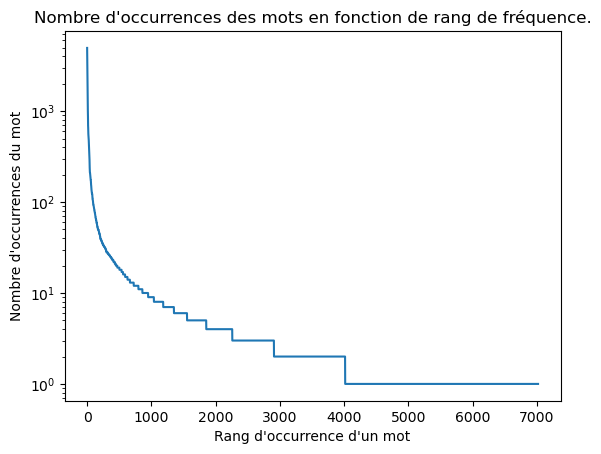

In [114]:
# On utilise l'échelle logarithmique, qui nous donne des résultats plus visibles.
plt.plot(x, y)
plt.yscale("log")
plt.xlabel("Rang d'occurrence d'un mot")
plt.ylabel("Nombre d'occurrences du mot")
plt.title("Nombre d'occurrences des mots en fonction de rang de fréquence.")
plt.show()

On voit un peu plus de détail au niveau du nombre d'occurrences. Il y a peu de mots (par rapport au nombre de mots uniques total) ayant une occurrence au dessus de 10, moins de 1000. En revanche, il y a plus de 3000 mots qui n'apparaissent qu'une fois dans le roman.

## Question 5

> 5. *Loi de Herdan ou de Heaps* : vérifiez la loi suivante : $|V| = k N^{\beta}$, avec $k>0$ et $0<\beta<1$ des constantes et $N$ le nombre de mots. Quelles valeurs trouvez vous pour $k$ et $\beta$.

Si on utilise le logarithme, on peut ensuite utiliser la régression logistique pour trouver les coefficients $k$ et $\beta$. Puisque $ \log|V| = \beta\log N + \log k \Leftrightarrow y = ax + b$, On peut utiliser les données précédentes pour avoir des coefficients similaires aux vrais. D'abord, on doit regarder les valeurs de $|V|$ pour plusieurs valeurs de $N$. Pour cela, il suffit juste de découper le texte et de prendre une partie de plus en plus grande. Ici, nous découpons en 20 parties, et ajoutons une partie au fur et à mesure. Une amélioration possible serait de prendre des paragraphes entiers au lieu de les couper en plein milieu.

In [115]:
heaps = np.array([[0,0]])
for i in range(1,21):
    cut_words = words_clean[:int(len(words_clean)*(5*i)/100)]
    c = collections.Counter((cut_words))
    freq_words_i = np.array(c.most_common())
    heaps = np.concatenate((heaps, np.array([[len(cut_words), len(freq_words_i)]])))

In [116]:
heaps = heaps[1:]
heaps

array([[ 4298,  1304],
       [ 8597,  2087],
       [12896,  2740],
       [17195,  3275],
       [21494,  3677],
       [25792,  4003],
       [30091,  4262],
       [34390,  4651],
       [38689,  4929],
       [42988,  5152],
       [47286,  5419],
       [51585,  5609],
       [55884,  5785],
       [60183,  6051],
       [64482,  6258],
       [68780,  6407],
       [73079,  6553],
       [77378,  6706],
       [81677,  6872],
       [85976,  7020]])

Ensuite on regarde la courbe réelle des valeurs :

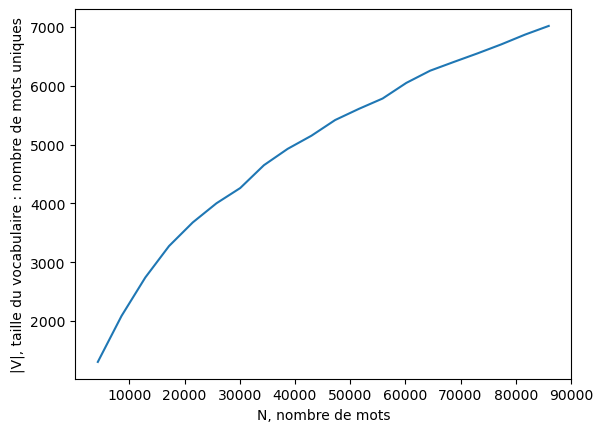

In [117]:
plt.plot(heaps[:, 0], heaps[:, 1])
plt.xlabel("N, nombre de mots")
plt.ylabel("|V|, taille du vocabulaire : nombre de mots uniques")
plt.show()

On entraîne le modèle avec toutes les valeurs. (On pourrait en créer d'autres pour voir le score).

In [118]:
from sklearn.linear_model import LinearRegression

In [119]:
# Une seule colonne de données.
X = np.log(heaps[:, 0]).reshape(len(heaps[:, 0]), 1)

In [120]:
y = np.log(heaps[:, 1])

In [121]:
reg = LinearRegression()
reg.fit(X, y)

LinearRegression()

In [122]:
print("Bêta chapeau = ", reg.coef_[0])
print("log k chapeau = ", reg.intercept_)

Bêta chapeau =  0.5402768678202082
log k chapeau =  2.7654184379023317


In [123]:
k_hat = np.exp(reg.intercept_)
beta_hat = reg.coef_[0]

In [124]:
N = np.linspace(0, 85000, num=20)

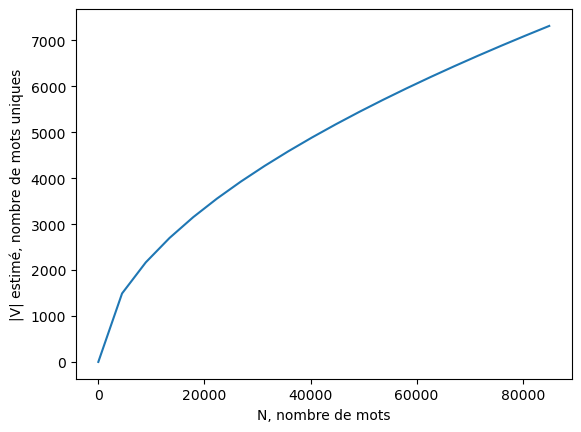

In [125]:
plt.plot(N, k_hat*(N**beta_hat))
plt.xlabel("N, nombre de mots")
plt.ylabel("|V| estimé, nombre de mots uniques")
plt.show()

Les courbes sont similaires, mais on pourrait mesurer la différence en prenant d'autres valeurs et en regardant le score de test.

In [126]:
heaps_example = np.array([[0,0]])
for i in range(1, 20):
    cut_words = words_clean[:int(len(words_clean)*(5*i+1)/100)]
    c = collections.Counter((cut_words))
    freq_words_i = np.array(c.most_common())
    heaps_example = np.concatenate((heaps_example, np.array([[len(cut_words), len(freq_words_i)]])))
heaps_example = heaps_example[1:, :]

In [127]:
# Test :
X_test = np.log(heaps_example[:, 0]).reshape(len(heaps_example[:, 0]), 1)
y_test = y = np.log(heaps_example[:, 1])
reg.score(X_test, y_test)

0.9907904834308886

Il y a un score de 99%, donc le modèle est assez bon.

## Question 6

In [128]:
def pairs(s) : 
    """ Calculating all the pairs possible from a vocabulary 
    """
    l = []
    for i in s : 
        for j in s : 
            if j != i : # not doubling the same character in a vocabulary
                l.append(i+j)
    return l


In [129]:
def calc_occurance(pair , l_chaine) : 
    """ Calculating the occurance of a pair in a list passed in parameters """
    counter = 0 
    for elem in l_chaine : 
        if len(elem) >= 2 : 
            for i in range(len(elem) - 1) :
                if elem[i] + elem[i+1] == pair :
                    counter +=1 
    return counter


In [130]:
def merge(pair , l_chaine) : 
    """ merging the most a pair in a list of words , usualy the most common one ( used in BPE )"""
    for elem in l_chaine : 
        if len(elem) >= 2 :  
            instant_len = len(elem) - 1 #to define the length of the word ( element ) at a given time since it changes when we merge a pair
            i = 0 
            while i < instant_len: 
                if elem[i] + elem[i+1] == pair :
                    elem[i] = pair  # merging and putting it in the ith place 
                    elem.pop(i+1) # deleting the i+1th element since we merged it 
                    i -=  1 # going a step back because the list has been modiefied to be one element shorter because of the pop 
                    instant_len -= 1 #the length now is the old length -1 since we popped an element 
                i+=1 
    return l_chaine

In [131]:
def BPE(chaine , k ) : 
    """ BPE algorithm used to get the vocabulary of a corpus """
    voc = set(''.join(chaine))
    chaine = [[*x] for x in chaine ]
    
    for i in range(k) : 
        prs = pairs(voc)    # calculating all the paris possible from a vocabulary 
        m = 0           #initiation of the maximum counter
        for pair in prs : 
            occ = calc_occurance(pair , chaine) # calculating the occurance 
            if occ >  m: 
                m = occ 
                to_add = pair           # saving the pair with the maximum reps for the moment
        print( "---> " + to_add , "occurance : " + str(m))
        chaine = merge(to_add,chaine)      # to merge the pairs with maximum repetition
        voc.add(to_add)
    
    return voc

In [132]:
words = "low_ "*5+"lowest_ "*2+"newer_ "*6 + "wider_ "*3 + "new_ "*2
list_of_words = words.split(" ")
BPE(list_of_words,8 )
        

---> r_ occurance : 9
---> er_ occurance : 9
---> ne occurance : 8
---> new occurance : 8
---> lo occurance : 7
---> low occurance : 7
---> newer_ occurance : 6
---> low_ occurance : 5


{'_',
 'd',
 'e',
 'er_',
 'i',
 'l',
 'lo',
 'low',
 'low_',
 'n',
 'ne',
 'new',
 'newer_',
 'o',
 'r',
 'r_',
 's',
 't',
 'w'}

# Important clarification for the results found : 
**Note that the third one added here is ew , which is not exactly what was in the example (ne) but this is totally okay and normal, it's only the way of how we are calculating the things, as we can see both ne and ew exist on the same words with the same repetitions, so they both have the same occurence and taking one or the other is true.**